In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split

In [296]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [297]:
cd /content/gdrive/'My Drive'/

/content/gdrive/My Drive


# **Лабораторная работа №4**

**Максимов Антон 17ПМИ**

##**I задание**

In [0]:
ElectricityData = pd.read_csv('electricity_plant.csv')

AT - температура


V - вакуум на выхлопе


AP - давление окружающей среды


RH - относительная влажность


PE - чистая почасовая выработка электроэнергии



Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

In [0]:
ElectricityData.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [0]:
ElectricityData.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [0]:
ElectricityData.corr() 

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


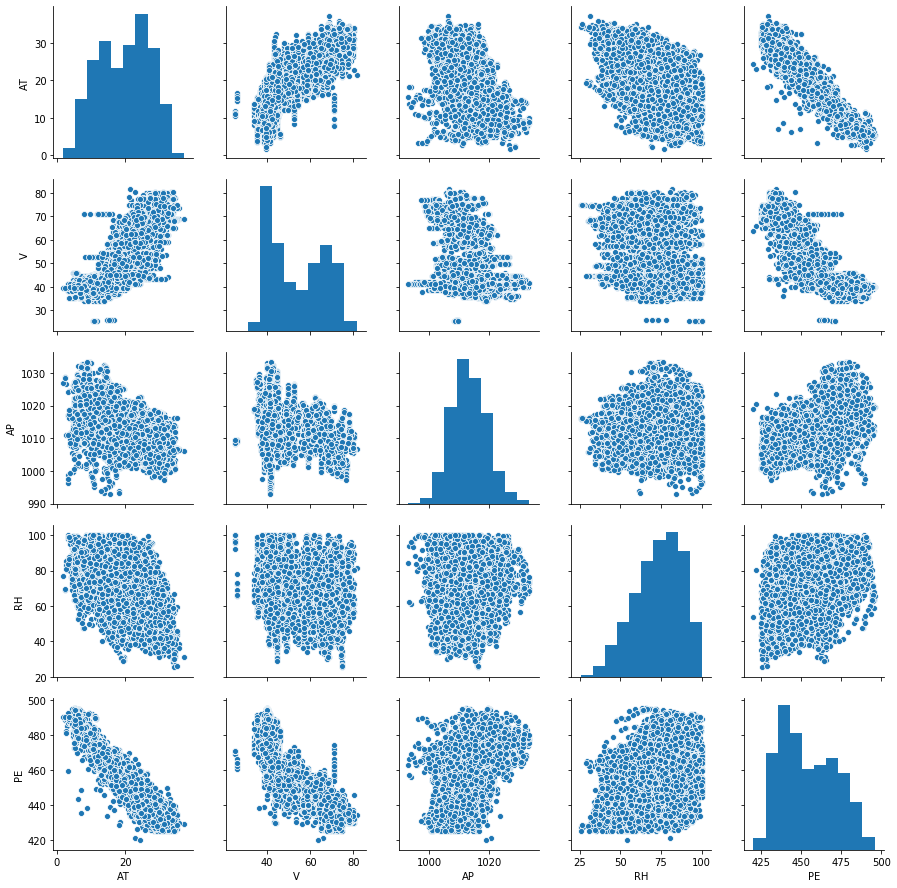

In [0]:
sns.pairplot(ElectricityData)

Если посмотреть на верхний правый plotможно уже мысленнно провести линию регрессии

###**Линейная регрессия**

In [620]:
X = ElectricityData.values[:, 0:-1]
y = ElectricityData.values[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 17)
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X)
print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

R2: 0.9286780681641783
MSE: 20.772646371326413


**Хороший результат R2-score - 0.928**

In [534]:
model.coef_

array([-1.96278716, -0.23571374,  0.07098719, -0.15720515])

In [578]:
model.intercept_

445.33807925320565

**Полученные коэффициенты соответсвуют температуре , вакууму на выхлопе, давлению окружающей среды, относительной влажности**

**Наиболее выражена обратная связь (так как знак коэффициента отрицательный) между температурой и выработкой электроэнергии, то есть чем меньше температура , больше выход электроэнергии**

**Аналогично с вакуумом и относительной влажностью, во всех случаях обратная связь**

**Однако прямая связь есть с давлением окружающей среды - чем больше давление, тем больше выработка, но его влияние незначительное**

Попробуем использовать только первый признак

In [621]:
X = ElectricityData[['AT']]
y = ElectricityData['PE']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 17)
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X)
print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y,y_pred))
print("Coefs: ", model.coef_)

R2: 0.8989421583270325
MSE: 29.433285864358737
Coefs:  [-2.16600933]


###**Ridge-регрессия**

In [579]:
X = ElectricityData.values[:, 0:-1]
y = ElectricityData.values[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 17)
model = Ridge()
model.fit(X_train, Y_train)
y_pred = model.predict(X)
print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y,y_pred))

R2: 0.9286780409044071
MSE: 20.77265431078591


In [580]:
model.coef_

array([-1.96275892, -0.23572435,  0.07099444, -0.15720042])

In [581]:
model.intercept_

445.33041104173077

**R2-score практически не изменился, как и коэффициенты, лишь небольшое отклонение в пределах 0.1**

####**График зависимости значения коэффициентов и R2 score от изменения параметра**

In [0]:
X = ElectricityData.values[:, 0:-1]
y = ElectricityData.values[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 17)
AT_coef = []
V_coef = []
AP_coef = []
RH_coef = []
r2_scores = []
param = np.exp(np.arange(-np.log(1000000), np.log(1000000), step=0.001))

for i in range(0,len(param)):
  model = Ridge(alpha = param[i])
  model.fit(X, y)
  y_pred = model.predict(X)

  AT_coef.append(model.coef_[0])
  V_coef.append(model.coef_[1])
  AP_coef.append(model.coef_[2])
  RH_coef.append(model.coef_[3])
  r2_scores.append(r2_score(y, y_pred))
param = np.asarray(param)
AT_coef = np.asarray(AT_coef)
V_coef = np.asarray(V_coef)
AP_coef = np.asarray(AP_coef)
RH_coef = np.asarray(RH_coef)
r2_scores = np.asarray(r2_scores)  
  


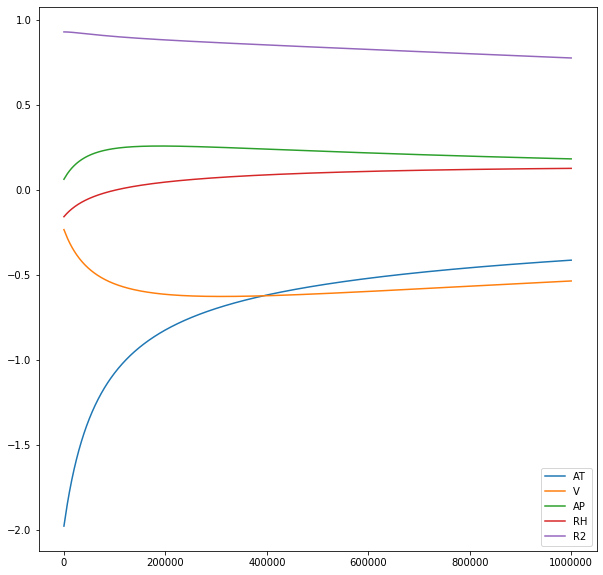

In [552]:
plt.figure(figsize=(10, 10))
plt.plot(param, AT_coef)
plt.plot(param, V_coef)
plt.plot(param, AP_coef)
plt.plot(param, RH_coef)
plt.plot(param, r2_scores)
labels = ['AT','V','AP','RH','R2']
plt.legend(labels)

**Лучший результат:**

In [299]:
np.argmax(r2_scores)

14

In [303]:
np.argmax(r2_scores)
print('Значение r2-score:', r2_scores[14])
print('Значение alpha:',param[14])
print('Коэфффициенты :', AT_coef[14],' ',V_coef[14],' ',AP_coef[14],' ', RH_coef[14])

Значение r2-score: 0.9286960898122537
Значение alpha: 1.014098458938485e-06
Коэфффициенты : -1.977513106613758   -0.23391642259070553   0.06208294378630226   -0.15805410291279404


###**Lasso-регрессия**

In [582]:
X = ElectricityData.values[:, 0:-1]
y = ElectricityData.values[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 17)
model = Lasso(alpha = 0.111)
model.fit(X_train, Y_train)
y_pred = model.predict(X)
print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y,y_pred))

R2: 0.9286725049982519
MSE: 20.774266653833045


**Коэффициенты почти не отличаются**

In [583]:
model.coef_

array([-1.95723875, -0.23752223,  0.06940149, -0.15558791])

In [584]:
model.intercept_

446.81520342229254

In [0]:
X = ElectricityData.values[:, 0:-1]
y = ElectricityData.values[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 17)
AT_coef = []
V_coef = []
AP_coef = []
RH_coef = []
r2_scores = []
param = np.arange(0, 200, step=0.01)
for i in range(0,len(param)):
  model = Lasso(alpha = param[i])
  model.fit(X, y)
  y_pred = model.predict(X)

  AT_coef.append(model.coef_[0])
  V_coef.append(model.coef_[1])
  AP_coef.append(model.coef_[2])
  RH_coef.append(model.coef_[3])
  r2_scores.append(r2_score(y, y_pred))
param = np.asarray(param)
AT_coef = np.asarray(AT_coef)
V_coef = np.asarray(V_coef)
AP_coef = np.asarray(AP_coef)
RH_coef = np.asarray(RH_coef)
r2_scores = np.asarray(r2_scores)  

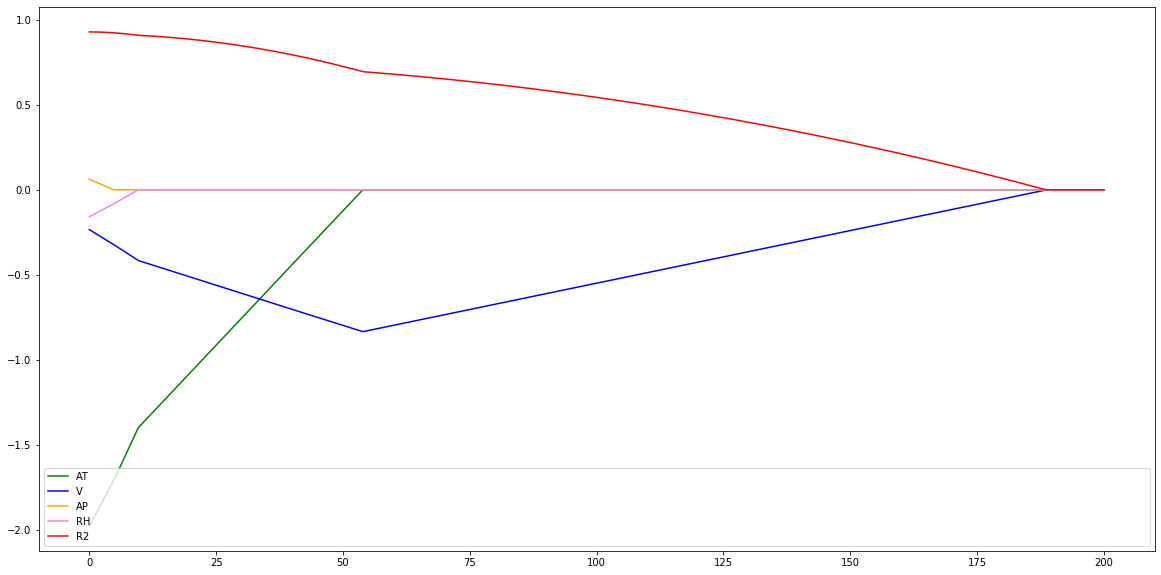

In [379]:
plt.figure(figsize=(20, 10))
plt.plot(param, AT_coef, color = 'green')
plt.plot(param, V_coef, color = 'blue')
plt.plot(param, AP_coef, color = 'orange')
plt.plot(param, RH_coef, color = 'violet')
plt.plot(param, r2_scores, color = 'red')
labels = ['AT','V','AP','RH','R2']
plt.legend(labels, mode = 'expand')

In [378]:
np.argmax(r2_scores)
print('Значение r2-score:', r2_scores[np.argmax(r2_scores)])
print('Значение alpha:',param[np.argmax(r2_scores)])
print('Коэфффициенты :', AT_coef[np.argmax(r2_scores)],' ',V_coef[np.argmax(r2_scores)],' ',AP_coef[np.argmax(r2_scores)],' ', RH_coef[np.argmax(r2_scores)])

Значение r2-score: 0.9286960898122537
Значение alpha: 0.0
Коэфффициенты : -1.9775131066353964   -0.23391642258249834   0.062082943780855646   -0.1580541029164143


**Первым зануляется AP, далее RH и AT, и V соответственно, по-моему такое зануление связано с тем как эти величины коррелируют с предсказываемым признаком, чем больше корреляция, тем быстрее зануляется**

In [553]:
ElectricityData.corr() 

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


##**II задание**

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
SoundData = pd.read_table('airfoil_self_noise.dat', header=None)

Attribute Information:

This problem has the following inputs:
1. Частота, in Hertzs.
2. Угол атаки, in degrees.
3. длина хорды, in meters.
4. Скорость свободного потока, in meters per second.
5. толщина смещения стороны всасывания, in meters.

The only output is:
6. Масштабированный уровень звукового давления, in decibels.

In [459]:
SoundData.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [0]:
SoundData.describe()

,0,1,2,3,4,5
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


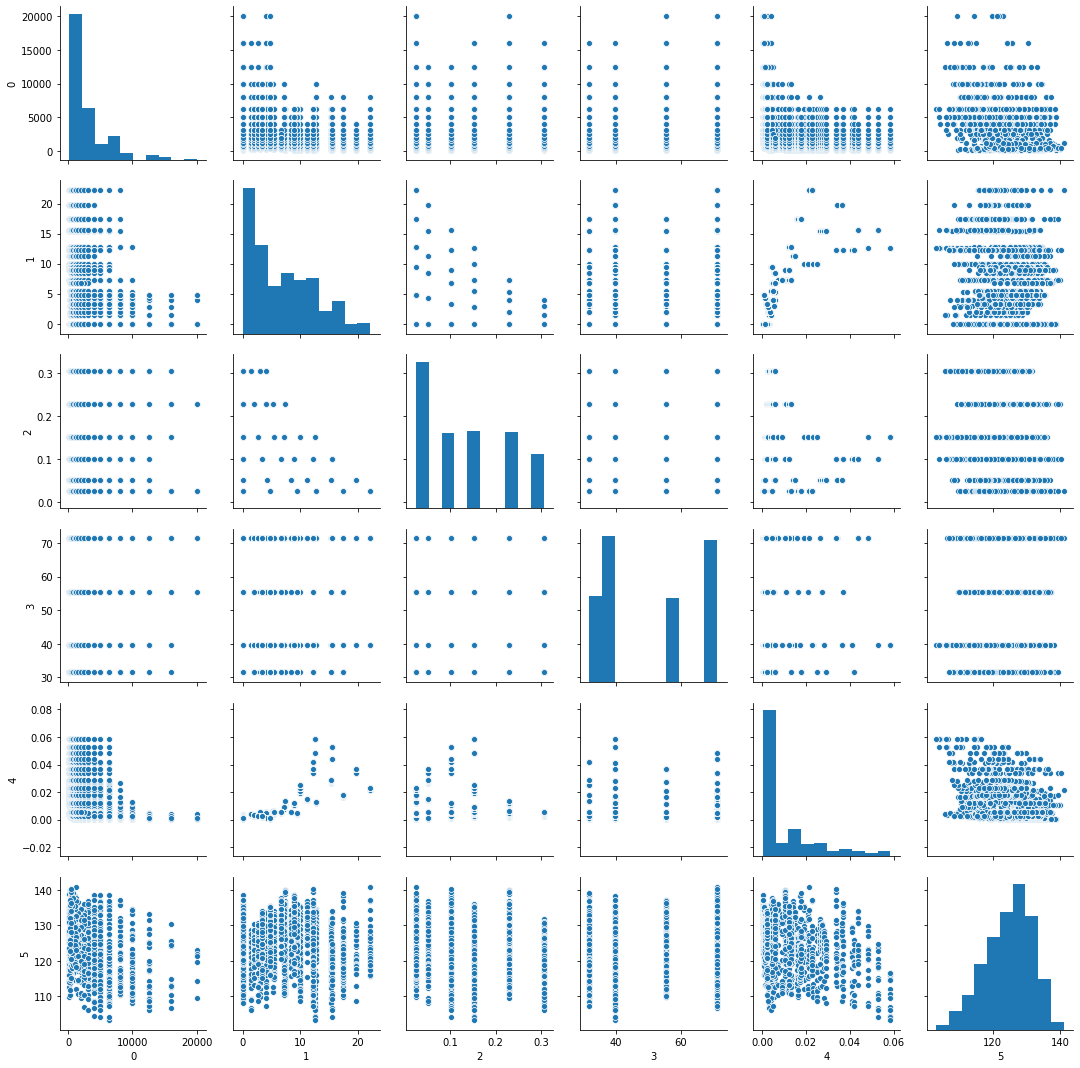

In [238]:
sns.pairplot(SoundData)

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [596]:
X = SoundData.values[:, 0:-1]
y = SoundData.values[:, -1]
pol = PolynomialFeatures(4)
X = pol.fit_transform(X)
X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 0)
model_Lasso = Lasso(alpha = 0.000001)
model_Ridge = Ridge(alpha = 0.000001)
model_Linear = LinearRegression()

model_Lasso.fit(X_train, Y_train)
model_Ridge.fit(X_train, Y_train)
model_Linear.fit(X_train, Y_train)

y_pred_L = model_Lasso.predict(X_test)
y_pred_R = model_Ridge.predict(X_test)
y_pred_Linear = model_Linear.predict(X_test)

print("R2 Lasso по тестам:", r2_score(Y_test, y_pred_L))
print("R2 Ridge по тестам:", r2_score(Y_test, y_pred_R))
print("R2 Linear по тестам:", r2_score(Y_test, y_pred_Linear))




R2 Lasso по тестам: 0.7388738735202367
R2 Ridge по тестам: 0.8261354819659255
R2 Linear по тестам: 0.8253406856250634


Интересный факт: Lasso довольно устойчива к изменению параметров PolynomialFeatures относительно других регрессоров

In [567]:
model_Linear.coef_.shape

(126,)

In [597]:
X = SoundData.values[:, 0:-1]
y = SoundData.values[:, -1]
pol = PolynomialFeatures(4)
X = pol.fit_transform(X)
X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 0)
model_Lasso = Lasso(alpha = 0.000001)
model_Ridge = Ridge(alpha = 0.000001)
model_Linear = LinearRegression()

model_Lasso.fit(X, y)
model_Ridge.fit(X, y)
model_Linear.fit(X, y)

y_pred_L = model_Lasso.predict(X)
y_pred_R = model_Ridge.predict(X)
y_pred_Linear = model_Linear.predict(X)

print("R2 Lasso при идеальных условиях по всей выборке:", r2_score(y, y_pred_L))
print("R2 Ridge при идеальных условиях по всей выборке:", r2_score(y, y_pred_R))
print("R2 Linear при идеальных условиях по всей выборке:", r2_score(y, y_pred_Linear))



R2 Lasso при идеальных условиях по всей выборке: 0.8001381543674018
R2 Ridge при идеальных условиях по всей выборке: 0.85578979750103
R2 Linear при идеальных условиях по всей выборке: 0.8558144735582067


In [0]:
new = np.round(model_Linear.coef_,2)

**Лучший результат у линейной регрессии - 0.8558 при идеальных условиях, предсказывая саму себя, в реальных условиях Ridge 0.8261**